<a href="https://colab.research.google.com/github/blmendes/portfolio/blob/main/nivelamento_dsV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Nivelamento - Data Science - Bruno Luiz Mendes </center>

In [ ]:
#https://www.linkedin.com/in/brunoluizmendes/

## Crimes em São Francisco

Utilizando o dataset de [crimes em São Francisco](https://s3-sa-east-1.amazonaws.com/lcpi/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv), mostre 4 gráficos que indicam as localidades dos crimes (dispersão), reproduzindo a imagem a seguir. Faça com suplots, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

![](https://s3-sa-east-1.amazonaws.com/lcpi/cabfd987-74ac-4d8e-b461-06d1837a4ee7.png)

In [ ]:
# Libs a ser utilizadas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import io
from matplotlib.colors import LogNorm

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('/content/dataset_ds_prova_lets_code.csv', sep='|')
data.head()

Saving dataset_ds_prova_lets_code.csv to dataset_ds_prova_lets_code.csv


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
3,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.420355,37.748906,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro
4,160004655,ASSAULT,BATTERY,Saturday,01/02/2016 12:00:00 AM,17:05,INGLESIDE,NONE,900 Block of GENEVA AV,-122.439910,37.715765,"(37.715765426995, -122.439909766772)",16000465504134,tarde,outro


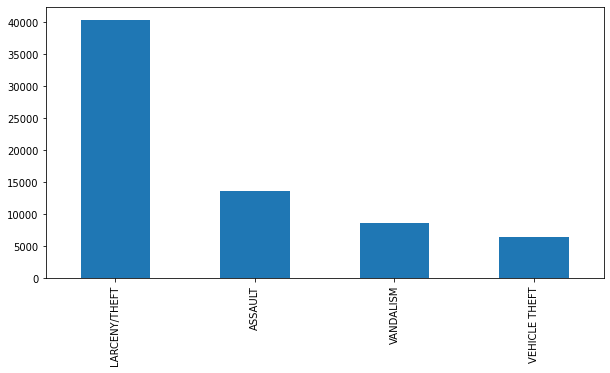

In [ ]:
plt.figure(figsize=(10,5))
data['Category'].value_counts().plot(kind='bar')

train_sub = data
categories = {c:i for i,c in enumerate(train_sub['Category'])}

def plot_data(constraint='Category', rownum=2, colnum=2):
    _, ax = plt.subplots(nrows=rownum, ncols=colnum,figsize=(20,20))
    i = 0
    j = 0
    for cat in data[constraint].unique():
        cat_sub = data[data[constraint] == cat]
        try:
            ax[j][i].hist2d(cat_sub.X, cat_sub.Y, bins=60, norm=LogNorm(), cmap=plt.cm.jet)
            ax[j][i].set_title('{0} {1}'.format(cat, len(cat_sub)))
        except(KeyError, IndexError):
            pass
        i+=1
        if i > colnum-1:
            i = 0
            j+=1
    plt.tight_layout()
    plt.show()

plot ex1 



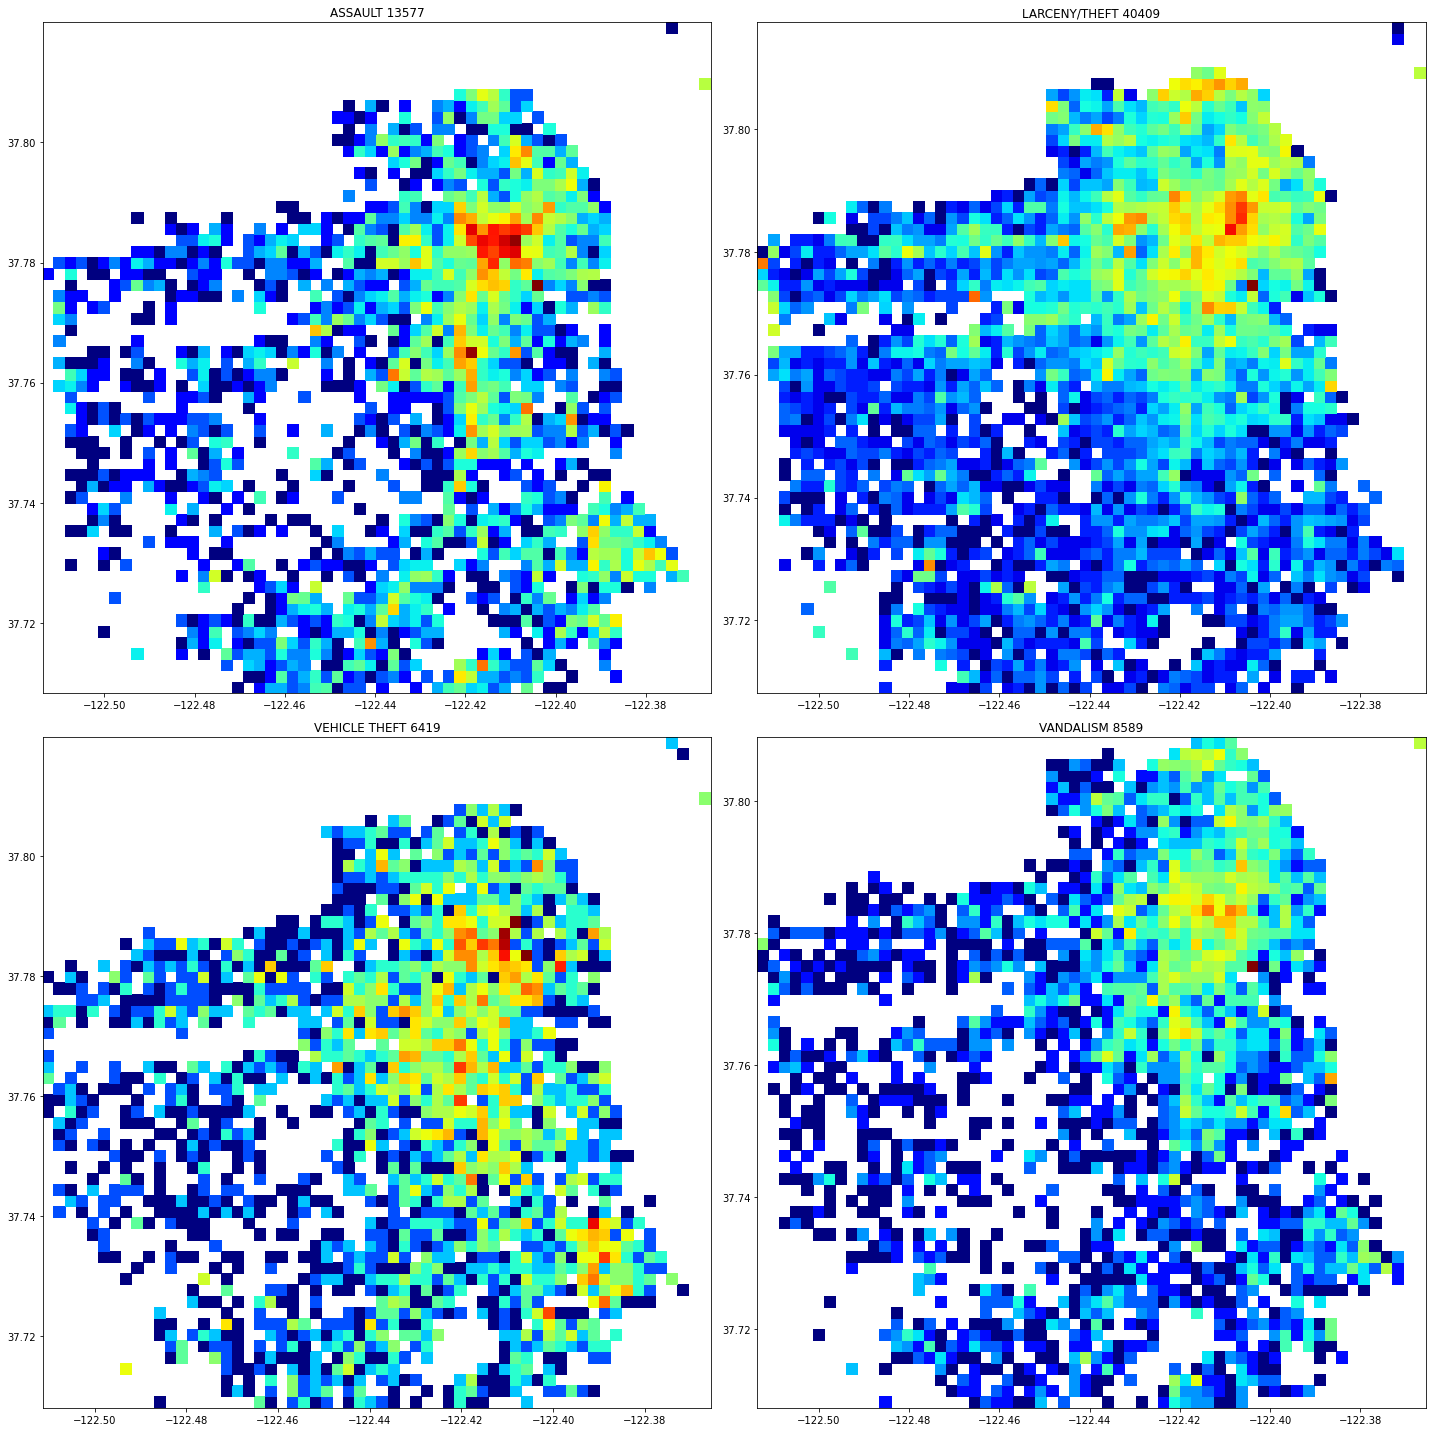

In [ ]:
print('plot ex1 \n')
plot_data()

In [ ]:
################################################################################################################################################################################################

## Regressão Linear  - 35 pts

Ajuste uma regressão linear, sem regularização e sem pré-processamento, usando o dataset disponível no [link](https://s3-sa-east-1.amazonaws.com/lcpi/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv), tomando as colunas EXPL_X como variáveis explicativas e a coluna RESP como variável resposta. Em seguida, assinale qual das alternativas a seguir denota as 3 variáveis que mais impactam o resultado do modelo.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

- a) EXPL_10, EXPL_9, EXPL_11
- b) EXPL_15, EXPL_23, EXPL_7
- c) EXPL_10, EXPL_7, EXPL_9
- d) EXPL_12, EXPL_14, EXPL_13
- e) EXPL_9, EXPL_11, EXPL_4

In [32]:
uploaded = files.upload()

data = pd.read_csv('/content/regress_prova_ds.csv', sep=',')
data.head()



,EXPL_0,EXPL_1,EXPL_2,EXPL_3,EXPL_4,EXPL_5,EXPL_6,EXPL_7,EXPL_8,EXPL_9,EXPL_10,EXPL_11,EXPL_12,EXPL_13,EXPL_14,EXPL_15,EXPL_16,EXPL_17,EXPL_18,EXPL_19,EXPL_20,EXPL_21,EXPL_22,EXPL_23,EXPL_24,RESP
0,-0.516612,-0.911046,-1.310863,0.198417,2.178032,0.809620,0.114453,0.017736,-0.597042,1.815517,-0.894091,1.813832,-0.655406,-1.166513,0.522693,0.826580,-0.143587,0.476833,-0.802338,0.272534,1.994768,-0.219452,1.076083,-1.664473,-0.295681,271.214983
1,1.575351,0.799166,1.713601,0.868442,0.499717,0.647438,-0.135092,-0.284663,-0.120399,-0.027060,-1.216633,-0.083220,-0.128559,0.804702,-1.390827,-0.966445,-1.463615,-1.284817,0.820637,-1.160558,-0.508827,-1.368782,0.824532,0.904665,-0.326862,-142.054307
2,0.643848,0.133967,-1.277565,1.011164,1.262008,0.933945,0.247755,-0.940966,0.334855,-0.440096,-1.106314,-0.403338,-0.121420,-0.846686,-1.389024,-0.181706,0.495279,-0.948654,0.948349,0.558893,0.350821,2.165832,0.607784,-0.403427,-0.107814,2.574030
3,-0.779519,1.226722,-0.202538,0.638357,-0.254927,-0.694636,-0.072524,-0.102900,-1.094016,0.687462,-0.215831,-1.940731,-0.058426,-1.038645,-0.226684,-0.340486,-1.372905,-1.885550,0.471528,-0.268754,-1.832324,-0.082042,-0.359472,-0.305451,0.738930,-106.937832
4,-0.083908,0.069170,-0.401373,-0.761437,1.900349,0.401358,-1.058474,-1.242542,-1.743173,-0.772286,-0.738163,-0.750177,0.321003,-0.060812,-1.240197,-1.426459,-1.284766,0.058901,0.649206,0.328945,-0.185247,0.354517,-0.329587,-0.618624,0.439020,22.277815


           EXPL_0    EXPL_1    EXPL_2  ...   EXPL_23   EXPL_24      RESP
EXPL_0   1.000000  0.000625  0.019832  ... -0.009997 -0.012959 -0.028055
EXPL_1   0.000625  1.000000 -0.053753  ... -0.019264  0.060652  0.086180
EXPL_2   0.019832 -0.053753  1.000000  ...  0.086575  0.084097 -0.082881
EXPL_3  -0.002230 -0.020575 -0.008308  ... -0.010061  0.008598  0.000420
EXPL_4  -0.072894 -0.021086 -0.005195  ...  0.050690  0.034459  0.258810
EXPL_5   0.028187 -0.005901  0.060586  ... -0.040990  0.032079  0.033384
EXPL_6  -0.056324 -0.009332  0.050059  ... -0.047802 -0.036320  0.007000
EXPL_7   0.015164 -0.061813  0.013743  ... -0.012765 -0.008771 -0.470610
EXPL_8  -0.000081 -0.006233 -0.016294  ... -0.041186 -0.001466  0.027234
EXPL_9   0.038909  0.076620 -0.036552  ...  0.019242  0.027191  0.419928
EXPL_10 -0.007860  0.057936 -0.109352  ...  0.029173  0.076985  0.526557
EXPL_11 -0.057636 -0.042118 -0.021526  ...  0.011740  0.006400  0.308346
EXPL_12 -0.026001  0.001273 -0.025345  ... -0.02285

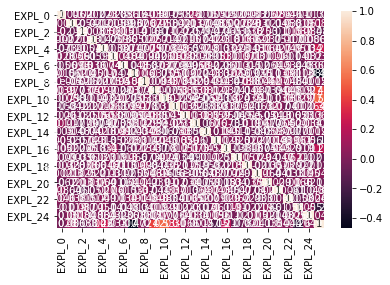

In [36]:
sns.heatmap(data.corr(), annot=True)
print(data.corr())

In [39]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top correlaçoes")
print(get_top_abs_correlations(data, 3))

Top correlaçoes
EXPL_10  RESP    0.526557
EXPL_7   RESP    0.470610
EXPL_9   RESP    0.419928
dtype: float64


sua resposta aqui: <b>c) EXPL_10, EXPL_7, EXPL_9

In [ ]:
################################################################################################################################################################################################

## Vencedor

Baseado nas tabelas, assinale a alternativa com o resultado da query descrita.

**Consulta não liberada.**

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/7dbafb1c-863b-405f-b602-ca67d927cd17.png" width="50%"/></center>

```sql
SELECT id FROM runners
WHERE id NOT IN (SELECT winner_id FROM races)
```

- a) 1 4 5
- b) 2 3 2
- c) Null
- d) John Doe; Alice Jones; Bobby Louis.
- e) 1 2 3

sua resposta aqui: <b> c) Null

In [ ]:
################################################################################################################################################################################################

## PLN - 10 pts

Um dos processos de extração de features de um texto consiste em converter um documento, como o apresentado abaixo:

```
"Eu acho que ela acha que ele não acha, mas ele achou."
```

em um vetor, como:

```
(acha, acho, achou, ela, ele, eu, mas, não, que)
[2 1 1 1 2 1 1 1 2]
```

Qual é o nome desse processo?

**Consulta não liberada.**

- a) POS
- b) BOW
- c) TF-IDF
- d) Tokenization
- e) Term Frequency

sua resposta aqui: <b> b) BOW

In [ ]:
################################################################################################################################################################################################

## Árvores - 10 pts

Algoritmos de árvores só são utilizados para previsão, seja de variável categórica (classificação) ou contínua (regressão).

Verdadeiro ou falso? Justifique.

**Consulta não liberada.**

sua resposta aqui: <b> sim, arvore de descisão e arvore de regressão